                       sweep   reconst
algorithm elements                    
c17       2         0.710078  0.028534
          4         0.663828  0.007681
          8         0.429392  0.008266
          16        0.254539  0.009407
          32        0.178134  0.011392
          64        0.157155  0.015381
          128       0.147670  0.022678
          256       0.135691  0.035688
          512       0.128097  0.057554
          1024      0.126481  0.093534
          2048      0.133614  0.152554
orig      2         0.745839  0.031541
          4         0.634712  0.008420
          8         0.425556  0.008844
          16        0.256412  0.009890
          32        0.159395  0.011958
          64        0.148184  0.016083
          128       0.140712  0.023685
          256       0.135891  0.037353
          512       0.132618  0.059684
          1024      0.133181  0.096997
          2048      0.144340  0.158832
tbb       2         0.712680  0.028643
          4         0.659

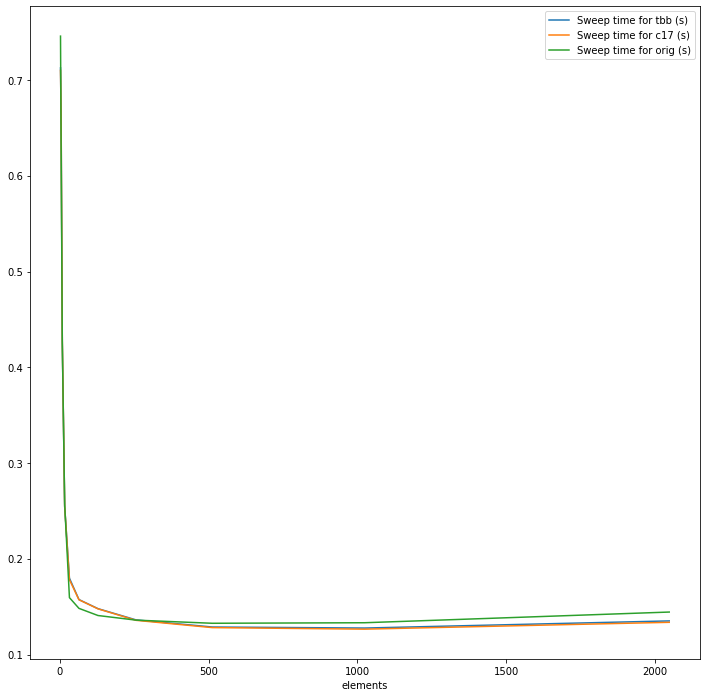

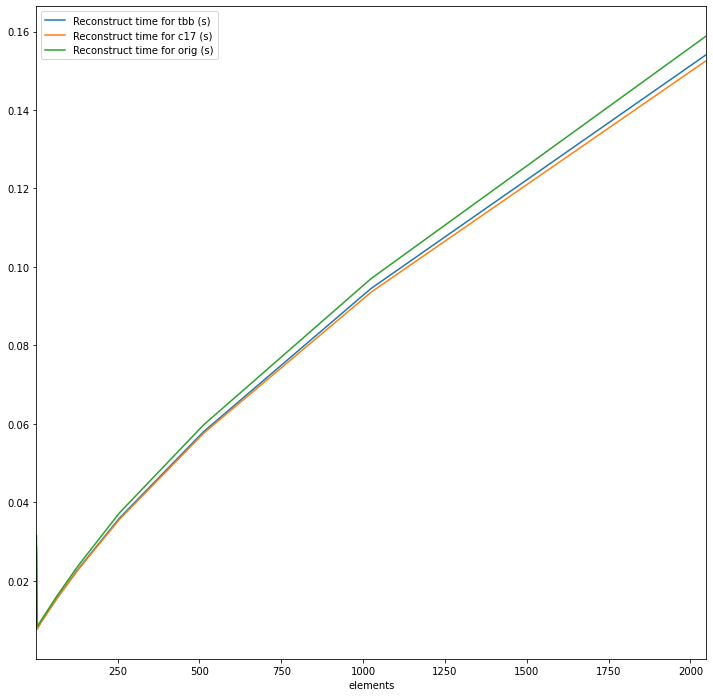

In [2]:
import pandas
import matplotlib.pyplot as plt
results = pandas.read_csv('frameworks.csv', names=('algorithm', 'sweep', 'reconst', 'elements'))
results = results.astype({'algorithm':'category'})
results = results.reindex(['algorithm', 'elements', 'sweep', 'reconst'], axis=1)
algorithms = ['tbb','c17','orig']
plot1, ax1 = plt.subplots(1,1,figsize=(12,12))
plot2, ax2 = plt.subplots(1,1,figsize=(12,12))
ax2.set_xlim(2,2048)
ax2.set_xlim(2,2048)
print(results.groupby(['algorithm', 'elements']).mean())
for i in algorithms:
    elements = results[results['algorithm'] == i].drop('algorithm',axis=1)
    sweep=elements.drop('reconst',axis=1).rename({'sweep':"Sweep time for " + i + " (s)"},axis=1)
    reconst=elements.drop('sweep',axis=1).rename({'reconst':"Reconstruct time for " + i + " (s)"},axis=1)
    sweep_mean = sweep.groupby('elements').mean()
    reconst_mean = reconst.groupby('elements').mean()
    sweep_mean.plot(ax=ax1)
    reconst_mean.plot(ax=ax2)

                                    time
method                elements          
Conditional Mutex     2         0.146514
                      4         0.145222
                      8         0.142841
                      16        0.142727
                      32        0.143994
                      64        0.151314
                      128       0.166211
                      256       0.196750
                      512       0.253487
                      1024      0.385452
                      2048      0.630519
Conditional Mutex-alt 2         0.146591
                      4         0.142355
                      8         0.142606
                      16        0.143236
                      32        0.143844
                      64        0.148341
                      128       0.164915
                      256       0.197623
                      512       0.252486
                      1024      0.378953
                      2048      0.616202
Mutex Lock      

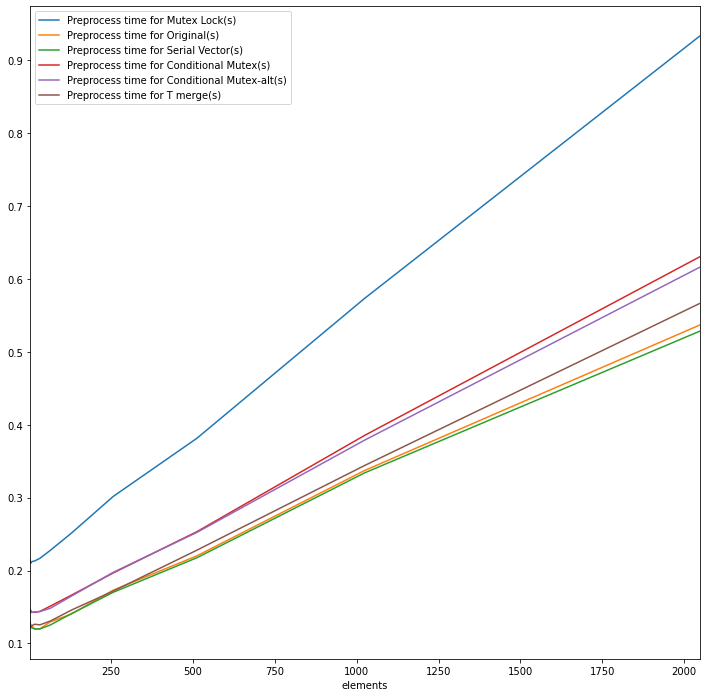

In [9]:
import pandas
import matplotlib.pyplot as plt
pandas.options.display.max_rows = 100
results = pandas.read_csv('preprocess.csv', names=('method', 'elements', 'time'))
results = results.astype({'method':'category'})
results = results.reindex(['method', 'time', 'elements'], axis=1)
methods = ['Mutex Lock','Original','Serial Vector', 'Conditional Mutex', "Conditional Mutex-alt", "T merge"]
plots, ax = plt.subplots(figsize=(12,12))
ax.set_xlim(2,2048)
for i in methods:
    elements = results[results['method'] == i].drop('method',axis=1).rename({'time':"Preprocess time for " + i +"(s)"},axis=1)
    elements_mean = elements.groupby('elements').mean()
    elements_mean.plot(ax=ax)
plots.savefig("preprocess.png")
print(str(results.groupby(['method', 'elements']).mean()))